# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# import libraries

# data manipulation
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Statistical analysis
import scipy.stats as stats

# for Linear regression
import statsmodels.api as sm

# model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# To build model for prediction - Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models - Decision tree
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit


## Data Overview

- Observations
- Sanity checks

In [ ]:
#Access to Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read data
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/INN Hotels/INNHotelsGroup.csv')

In [ ]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [ ]:
df.shape

(36275, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
df.nunique(axis=0)

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [ ]:
#Drop Booking ID, as its unique for each reservation and has no effect in prediction
df.drop('Booking_ID', axis=1,inplace=True)

In [ ]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
df['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [ ]:
df['avg_price_per_room'].unique()

array([ 65.  , 106.68,  60.  , ..., 118.43, 137.25, 167.8 ])

In [ ]:
pd.concat([df['type_of_meal_plan'],df['room_type_reserved'],df['market_segment_type'],df['no_of_special_requests']]).unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3',
       'Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3', 'Offline', 'Online',
       'Corporate', 'Aviation', 'Complementary', 0, 1, 3, 2, 4, 5],
      dtype=object)

In [ ]:
df.groupby('market_segment_type')['booking_status'].value_counts()

market_segment_type  booking_status
Aviation             Not_Canceled         88
                     Canceled             37
Complementary        Not_Canceled        391
Corporate            Not_Canceled       1797
                     Canceled            220
Offline              Not_Canceled       7375
                     Canceled           3153
Online               Not_Canceled      14739
                     Canceled           8475
Name: booking_status, dtype: int64

In [ ]:
df.groupby('repeated_guest')['booking_status'].value_counts()

repeated_guest  booking_status
0               Not_Canceled      23476
                Canceled          11869
1               Not_Canceled        914
                Canceled             16
Name: booking_status, dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


Observations:
- Data set has 36275 rows and 19 columns
- No null values
- there are 13 integer columns and 4 object columns
- Booking status is Dependant/Target variable and others are Independant/Input variables
- Booking ID is unique for each reservation and has no effect in prediction, So, dropping that column from Input variables
- The important factor affecting cancellation is Market segment type. The values are 'Offline', 'Online','Corporate', 'Aviation', 'Complementary'

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

**EDA - Observations:**

- Room type1 is the most reserved type of room
- Meal type 1 is the most opted food option
- Majority of reservations are through online channels
- Average price depends on number of guests, both Adults and kids
- If number of kids are more, price increases
- Loyal, repeating customers are not cancelling mostly
- If a reservation is made ahead of time, chance of cancellation increases
- cancellation decreases when Number of special requests increases
- Cancellation is more on weekdays than weekends
- If the price increases, likelyhood of cancellation increases
- Online reservations are the major category for cancellation, whereas complimentary segment is almost zero in cancellation
- Corporate cancellations are very less

**What are the busiest months in the hotel?**
- October followed by september, August

**Which market segment do most of the guests come from?**
-Online

**Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**
- Following are the price slabs for different market segments
- Online - above $110

- Aviation - $100 approx

- offline - $90 approx

- Corporate - $85

- Complimentary - free

**What percentage of bookings are canceled?**
- 32.76%

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**
- 1.72

**Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**
- yes, when the number of special requests increases, cancellation decreases.

In [ ]:
#Percentage of cancelled bookings
df['booking_status'].value_counts()

cancelled = df[df['booking_status'] =='Canceled']
cancelled_count = cancelled.count()[0]
total_reservations = df.count()[0]
per_cancelled = (cancelled_count/total_reservations)*100

print(per_cancelled)

32.76361130254997


In [ ]:
#percentage of repeating guests cancellation
#and df['booking_status'] == 'Canceled'
df['repeated_guest'].value_counts()

repeated_guest = df[df['repeated_guest'] == 1]
cust_repeat = repeated_guest.count()[0]
repeated_guest_cancel = repeated_guest[repeated_guest['booking_status'] == 'Canceled']
Cancelcount_repeatcust = repeated_guest_cancel.count()[0]
percentage = (Cancelcount_repeatcust/cust_repeat)*100

print(percentage)

1.7204301075268817


<Axes: xlabel='market_segment_type', ylabel='avg_price_per_room'>

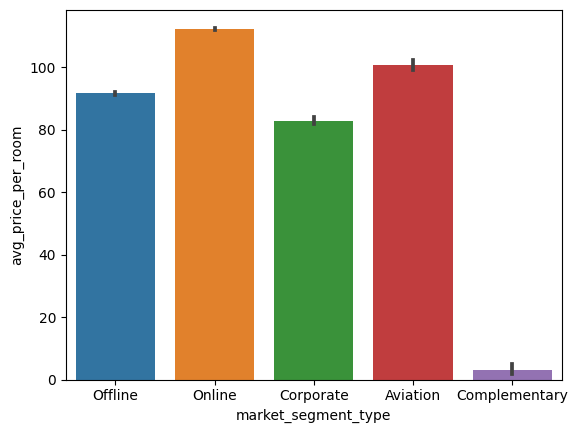

In [ ]:
#price vs market segment
sns.barplot(y=df['avg_price_per_room'],x=df['market_segment_type'])

In [ ]:
#Univariate analysis

#Numerical and categorical data separation
num_col = df.select_dtypes(include=[np.number])
cat_col = df.select_dtypes(exclude=[np.number])


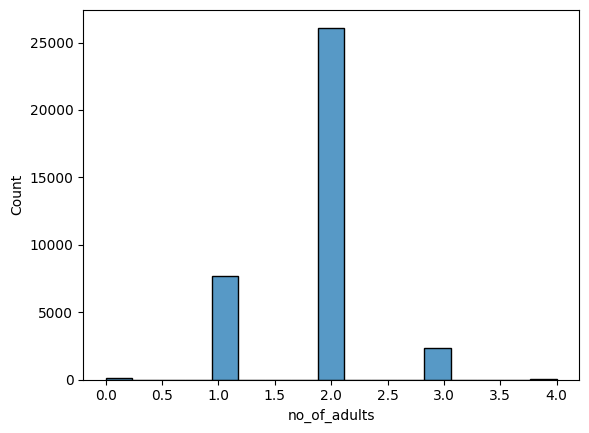

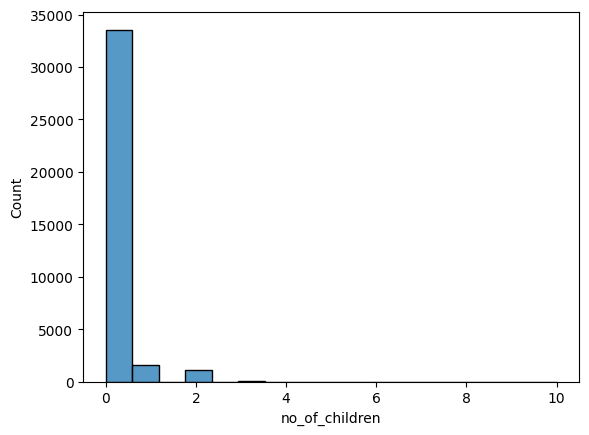

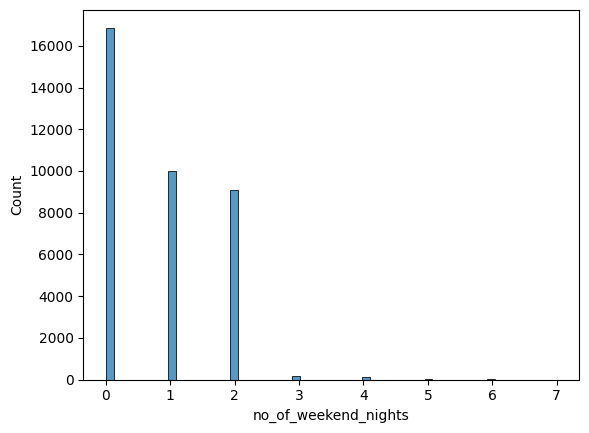

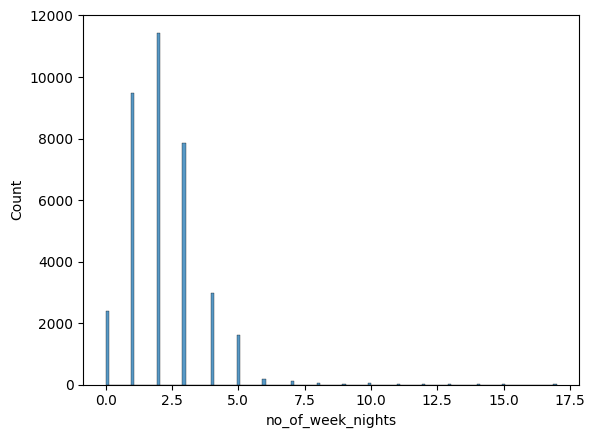

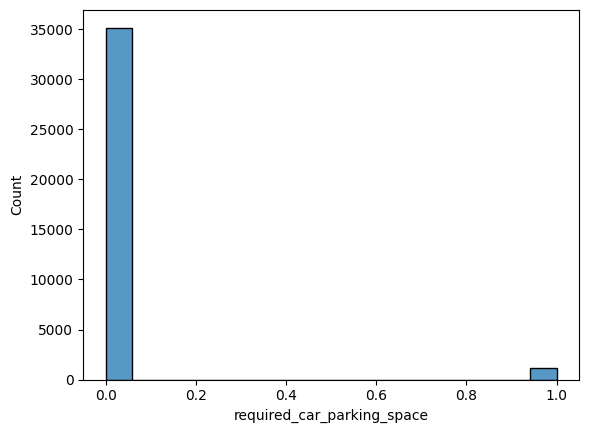

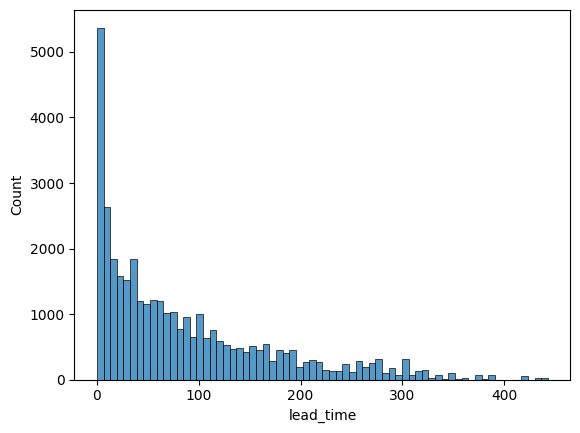

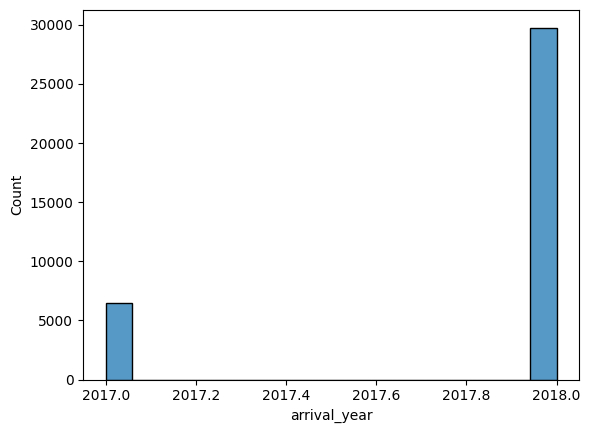

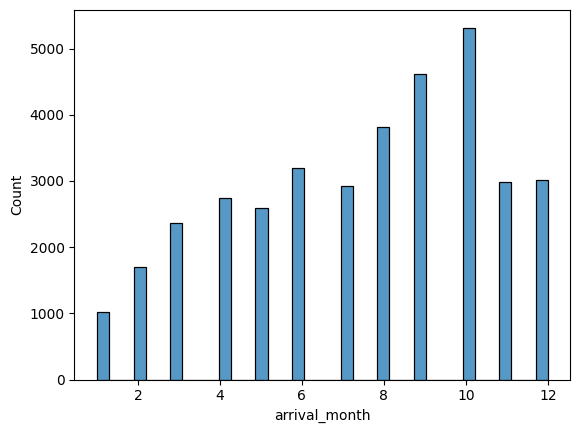

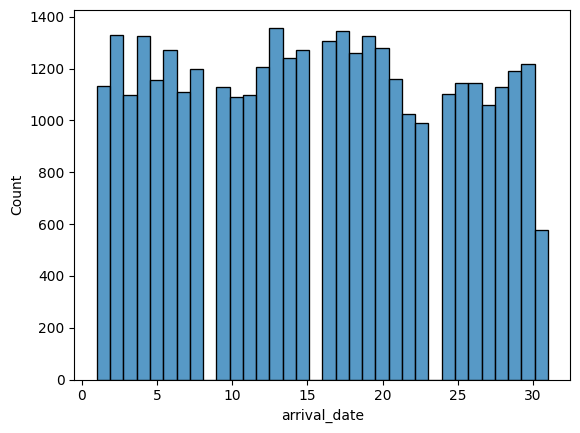

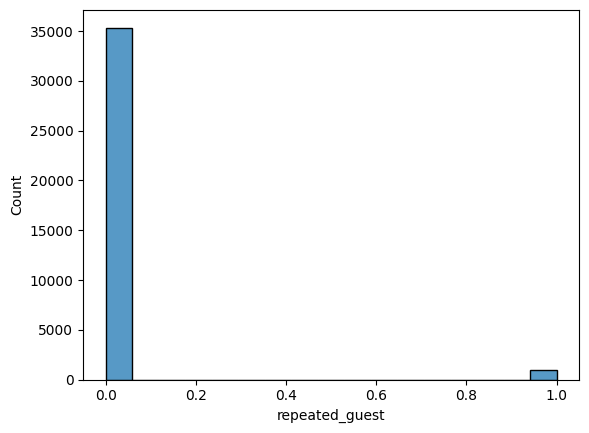

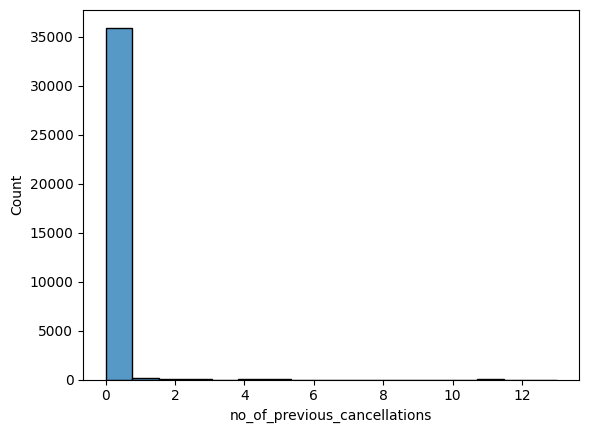

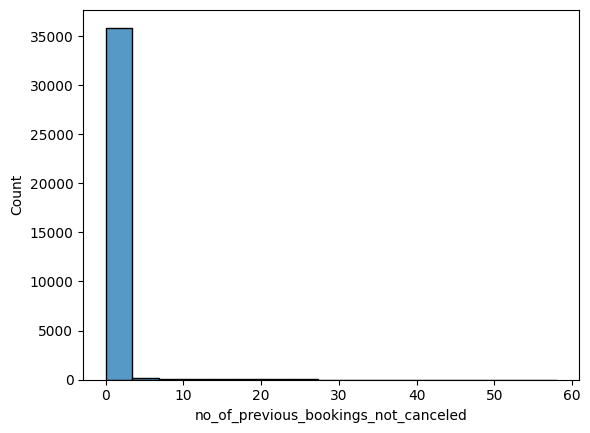

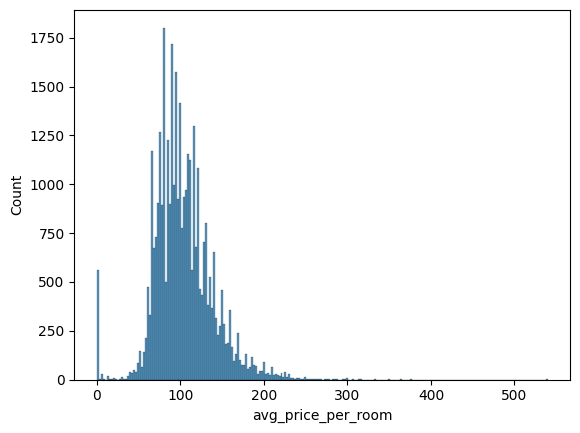

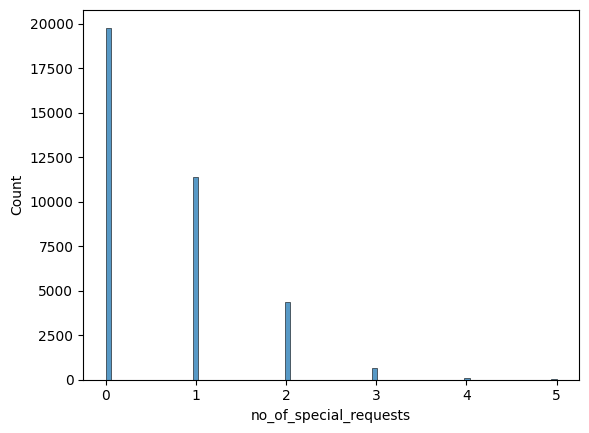

In [ ]:
#visualization for numerical columns
for columns in num_col:
  plt.figure(columns)
  sns.histplot(data=num_col,x=num_col[columns])


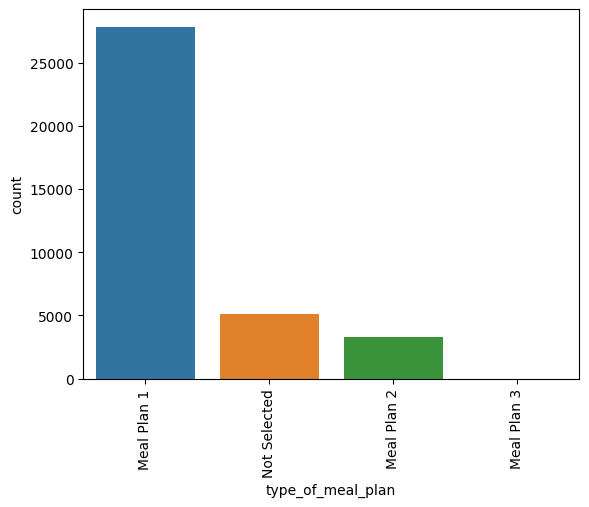

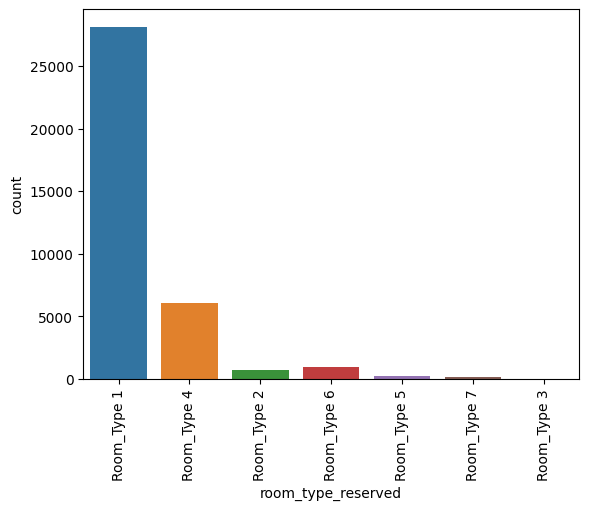

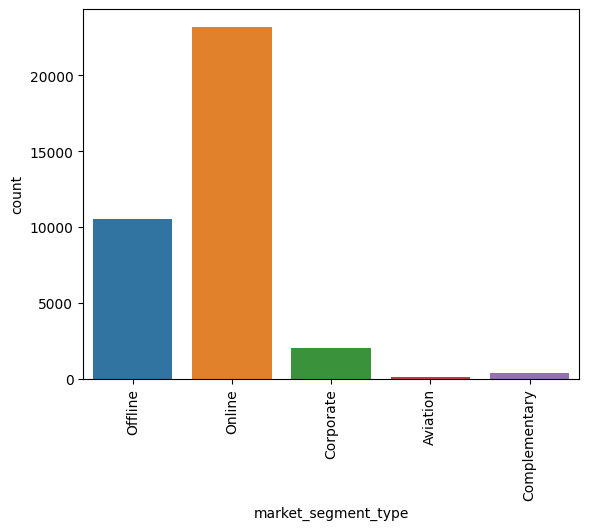

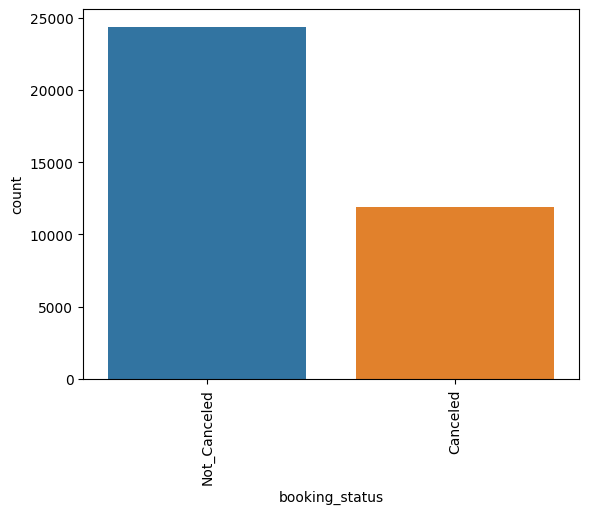

In [ ]:
#visulization for categorical columns
for columns in cat_col:
  plt.figure(columns)
  chart = sns.countplot(data=cat_col,x=cat_col[columns])
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90);

<ipython-input-132-2bdd90461250>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

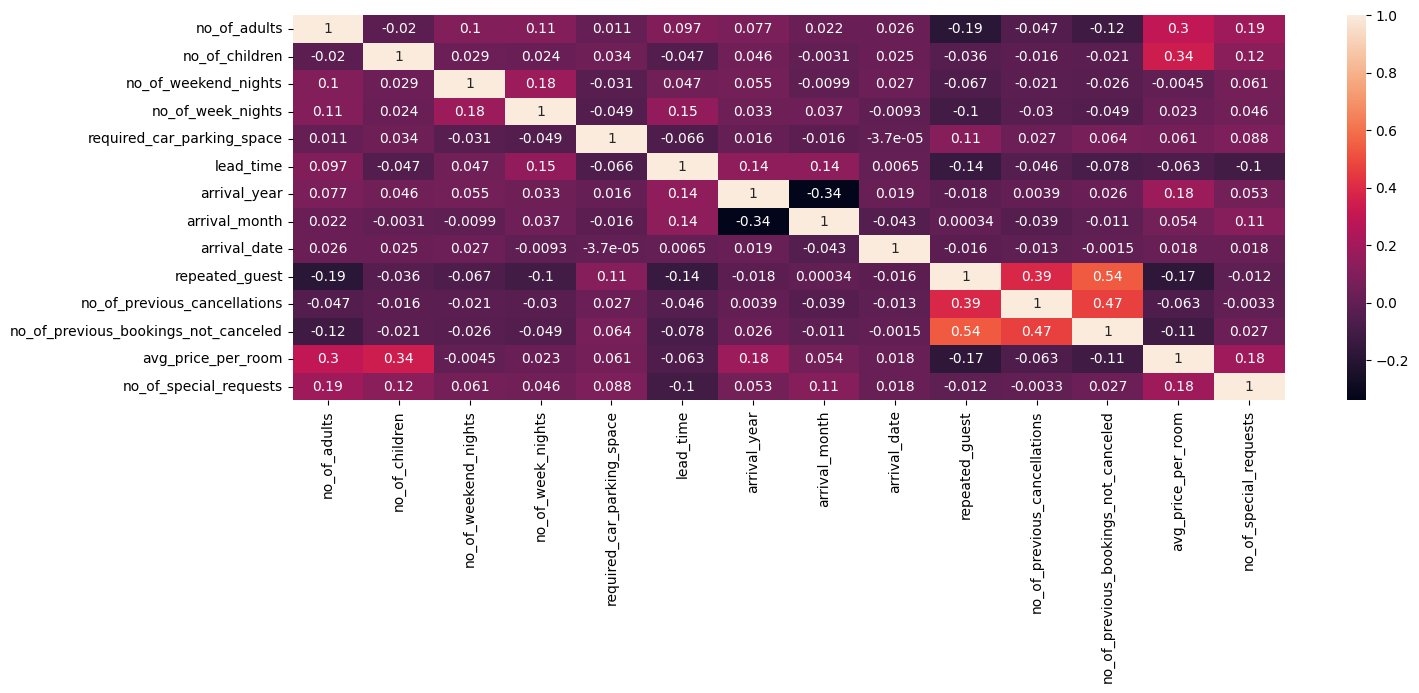

In [ ]:
#Bivariate analysis
#Heat map

plt.figure(figsize = (16,5))
sns.heatmap(df.corr(),annot=True)

In [ ]:
cat_col

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
0,Meal Plan 1,Room_Type 1,Offline,Not_Canceled
1,Not Selected,Room_Type 1,Online,Not_Canceled
2,Meal Plan 1,Room_Type 1,Online,Canceled
3,Meal Plan 1,Room_Type 1,Online,Canceled
4,Not Selected,Room_Type 1,Online,Canceled
...,...,...,...,...
36270,Meal Plan 1,Room_Type 4,Online,Not_Canceled
36271,Meal Plan 1,Room_Type 1,Online,Canceled
36272,Meal Plan 1,Room_Type 1,Online,Not_Canceled
36273,Not Selected,Room_Type 1,Online,Canceled


In [ ]:
cat_col_excepttarget = cat_col.drop('booking_status',axis=1)
target = cat_col['booking_status']

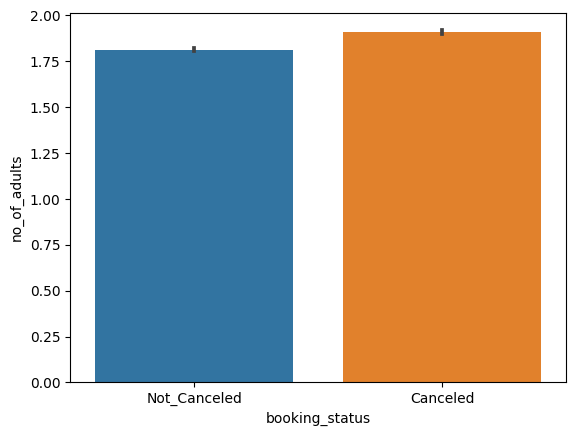

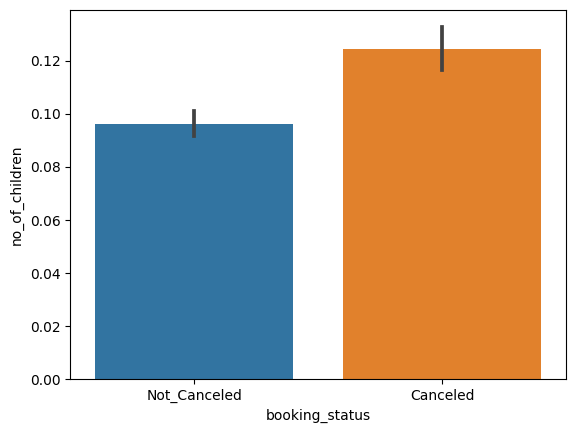

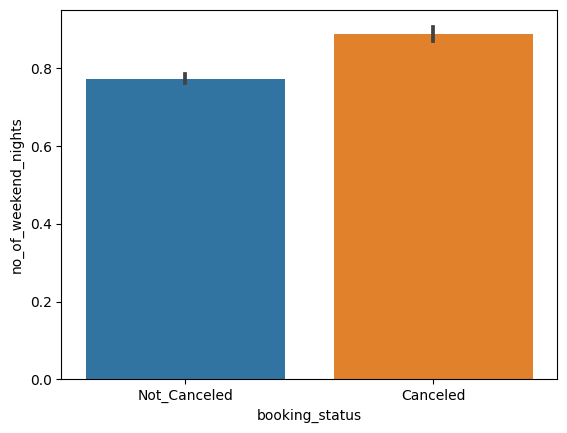

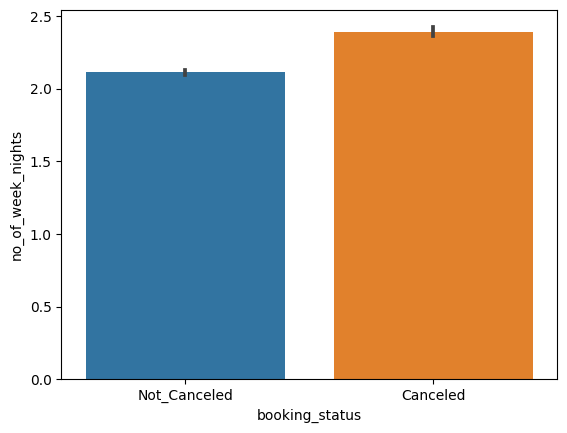

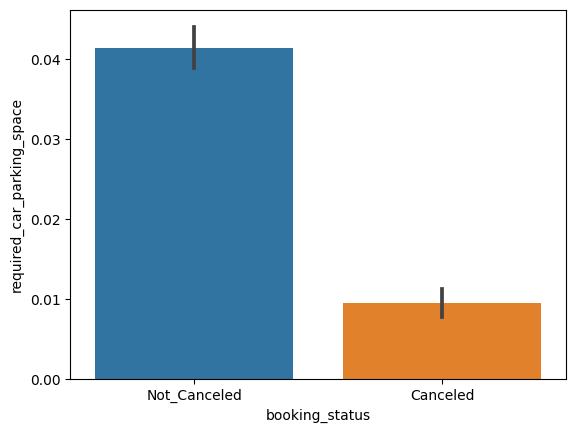

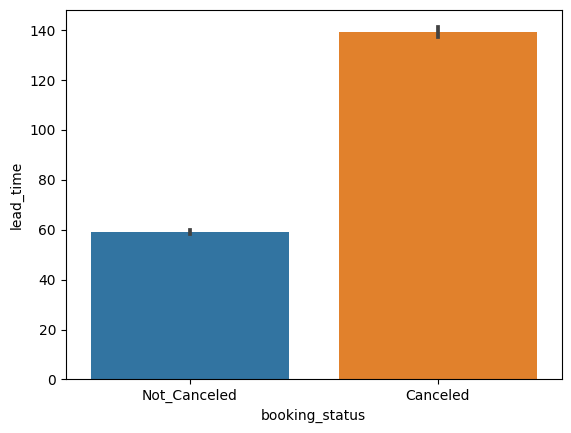

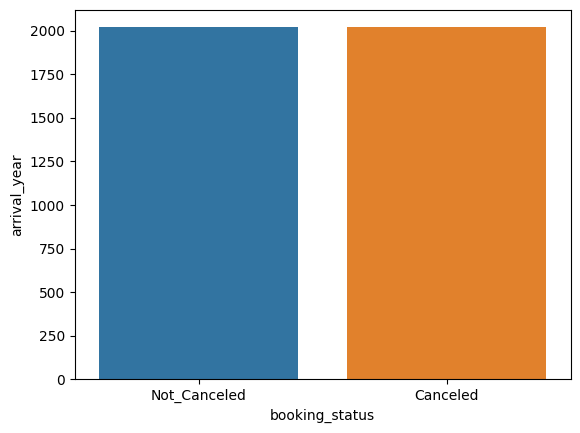

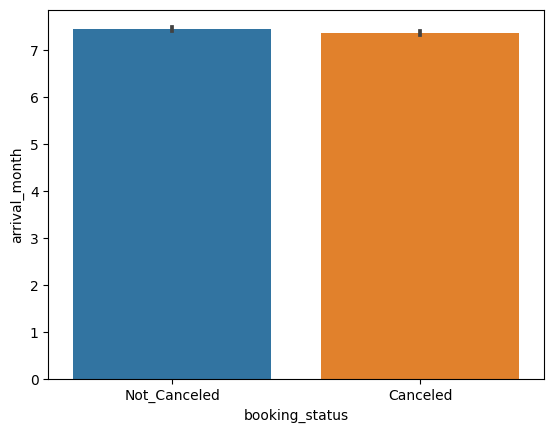

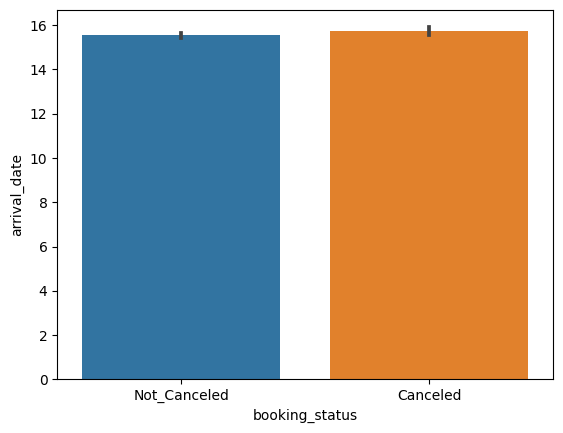

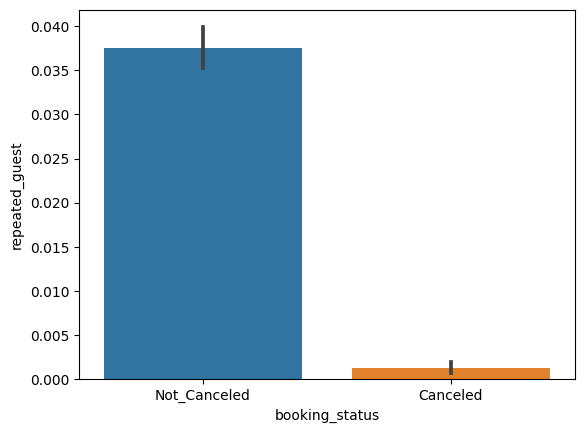

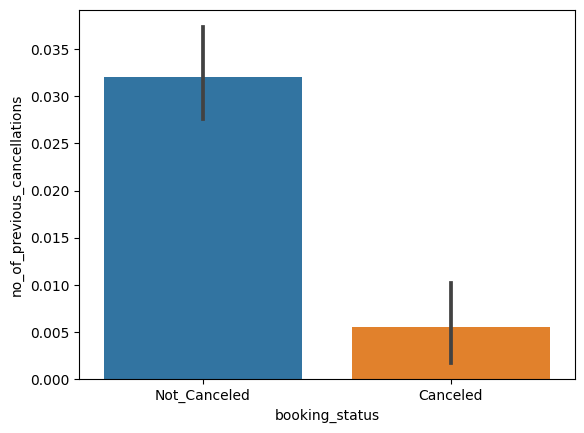

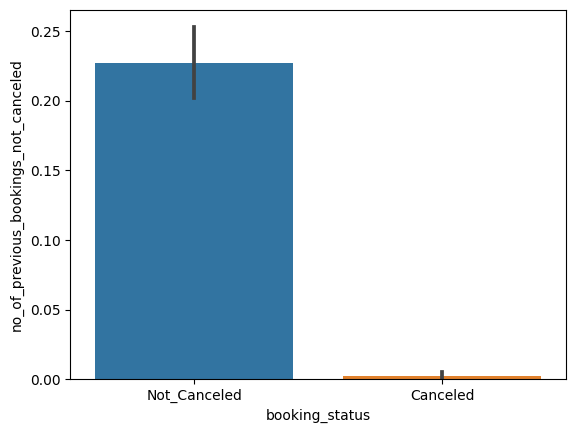

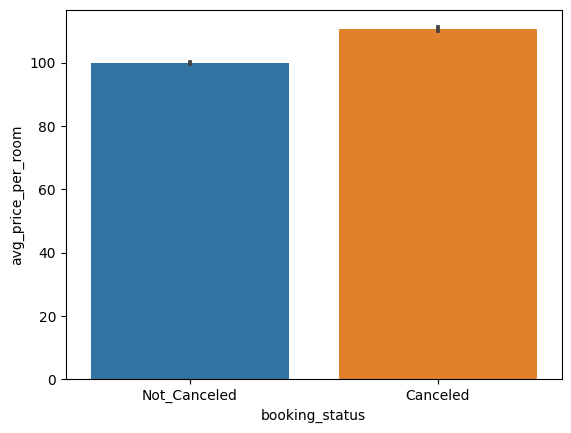

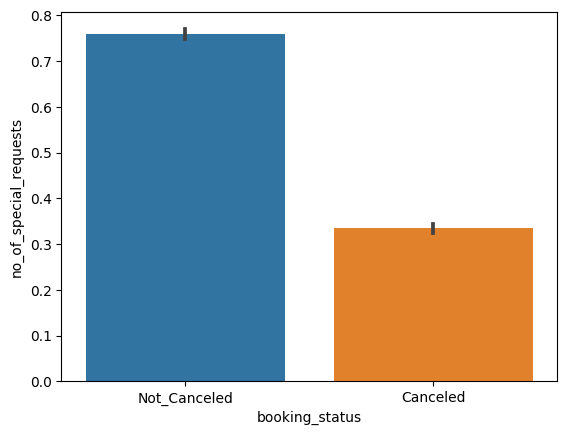

In [ ]:
#target vs numerical columns
for columns in num_col:
  plt.figure(columns)
  sns.barplot(y=num_col[columns],x=target)

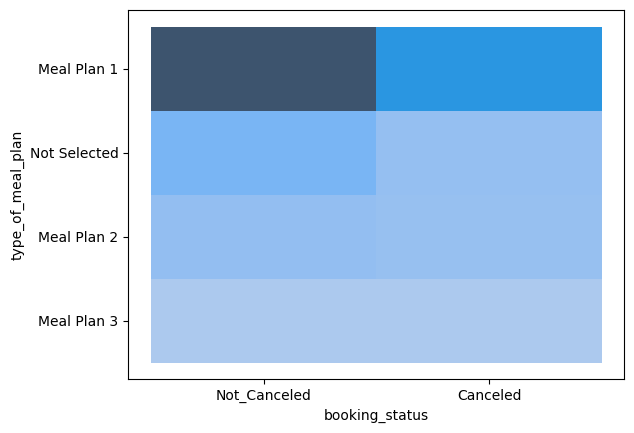

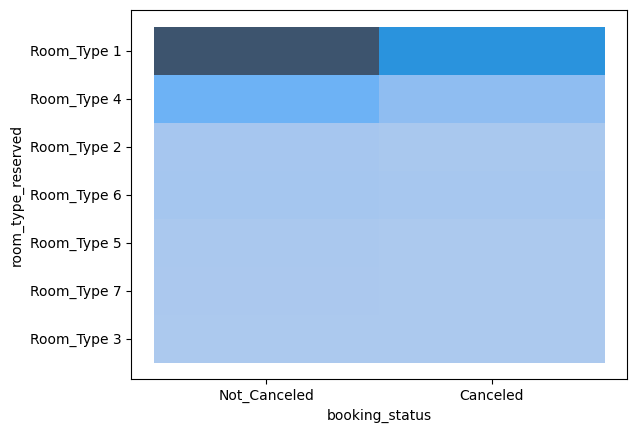

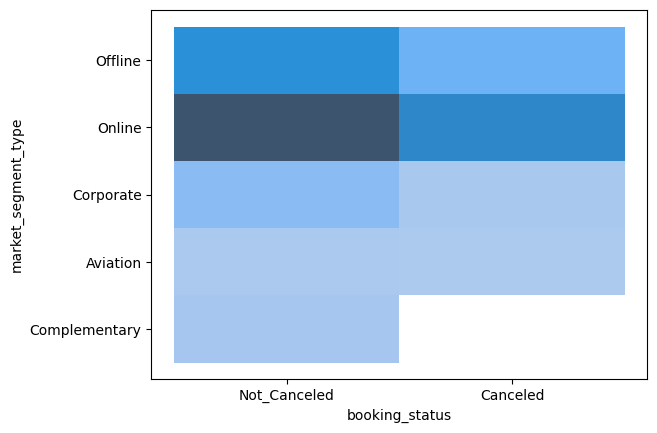

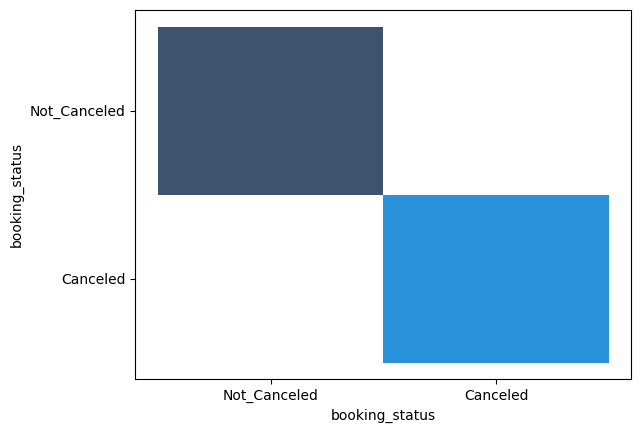

In [ ]:
#target vs categorical columns
for columns in cat_col:
  plt.figure()
  sns.histplot(x=target,y=cat_col[columns])

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
df['type_of_meal_plan'].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [ ]:
#Data prep - convert categorical columns to numerical
#Replace type_of_meal_plan with corresponding numbers

# create a dictionary of replacements
replacements = {'Meal Plan 1': '1', 'Meal Plan 2': '2','Meal Plan 3' : '3', 'Not Selected' : '0'}

# replace values using the .map() method
df['type_of_meal_plan'] = df['type_of_meal_plan'].map(replacements).fillna(df['type_of_meal_plan'])
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,0,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,0,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,0,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [ ]:
df['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [ ]:
#Replace room_type_reserved with corresponding numbers

# create a dictionary of replacements
replacements_room = {'Room_Type 1': '1', 'Room_Type 2': '2','Room_Type 3' : '3', 'Room_Type 4' : '4','Room_Type 5' : '5','Room_Type 6' : '6','Room_Type 7' : '7'}

# replace values using the .map() method
df['room_type_reserved'] = df['room_type_reserved'].map(replacements_room).fillna(df['room_type_reserved'])
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,0,0,1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,1,0,1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,1,0,1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,0,0,1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,1,0,4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,1,0,1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,1,0,1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,0,0,1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [ ]:
df['market_segment_type'].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [ ]:
#One hot coding for market_segment_type, keep all values - no drop first
#pd.get_dummies(df_train2, columns=['Cuisine','Restaurant Location','Restaurant Theme','City','Restaurant Type','Endorsed By'], drop_first=True)

df1 = pd.get_dummies(df, columns=['market_segment_type'],drop_first=True)
df1

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,1,0,1,224,2017,10,2,0,0,0,65.00,0,Not_Canceled,0,0,1,0
1,2,0,2,3,0,0,1,5,2018,11,6,0,0,0,106.68,1,Not_Canceled,0,0,0,1
2,1,0,2,1,1,0,1,1,2018,2,28,0,0,0,60.00,0,Canceled,0,0,0,1
3,2,0,0,2,1,0,1,211,2018,5,20,0,0,0,100.00,0,Canceled,0,0,0,1
4,2,0,1,1,0,0,1,48,2018,4,11,0,0,0,94.50,0,Canceled,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,1,0,4,85,2018,8,3,0,0,0,167.80,1,Not_Canceled,0,0,0,1
36271,2,0,1,3,1,0,1,228,2018,10,17,0,0,0,90.95,2,Canceled,0,0,0,1
36272,2,0,2,6,1,0,1,148,2018,7,1,0,0,0,98.39,2,Not_Canceled,0,0,0,1
36273,2,0,0,3,0,0,1,63,2018,4,21,0,0,0,94.50,0,Canceled,0,0,0,1


In [ ]:
#One hot coding for booking_status

df2 = pd.get_dummies(df1, columns=['booking_status'], drop_first=True)
df2

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Not_Canceled
0,2,0,1,2,1,0,1,224,2017,10,2,0,0,0,65.00,0,0,0,1,0,1
1,2,0,2,3,0,0,1,5,2018,11,6,0,0,0,106.68,1,0,0,0,1,1
2,1,0,2,1,1,0,1,1,2018,2,28,0,0,0,60.00,0,0,0,0,1,0
3,2,0,0,2,1,0,1,211,2018,5,20,0,0,0,100.00,0,0,0,0,1,0
4,2,0,1,1,0,0,1,48,2018,4,11,0,0,0,94.50,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,1,0,4,85,2018,8,3,0,0,0,167.80,1,0,0,0,1,1
36271,2,0,1,3,1,0,1,228,2018,10,17,0,0,0,90.95,2,0,0,0,1,0
36272,2,0,2,6,1,0,1,148,2018,7,1,0,0,0,98.39,2,0,0,0,1,1
36273,2,0,0,3,0,0,1,63,2018,4,21,0,0,0,94.50,0,0,0,0,1,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  repeated_guest 

In [ ]:
#Change the obj datatype to int - room_type_reserved, type_of_meal_plan

df2[['type_of_meal_plan','room_type_reserved']] = df2[['type_of_meal_plan','room_type_reserved']].apply(pd.to_numeric)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int64  
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  repeated_guest 

## EDA

- It is a good idea to explore the data once again after manipulating it.

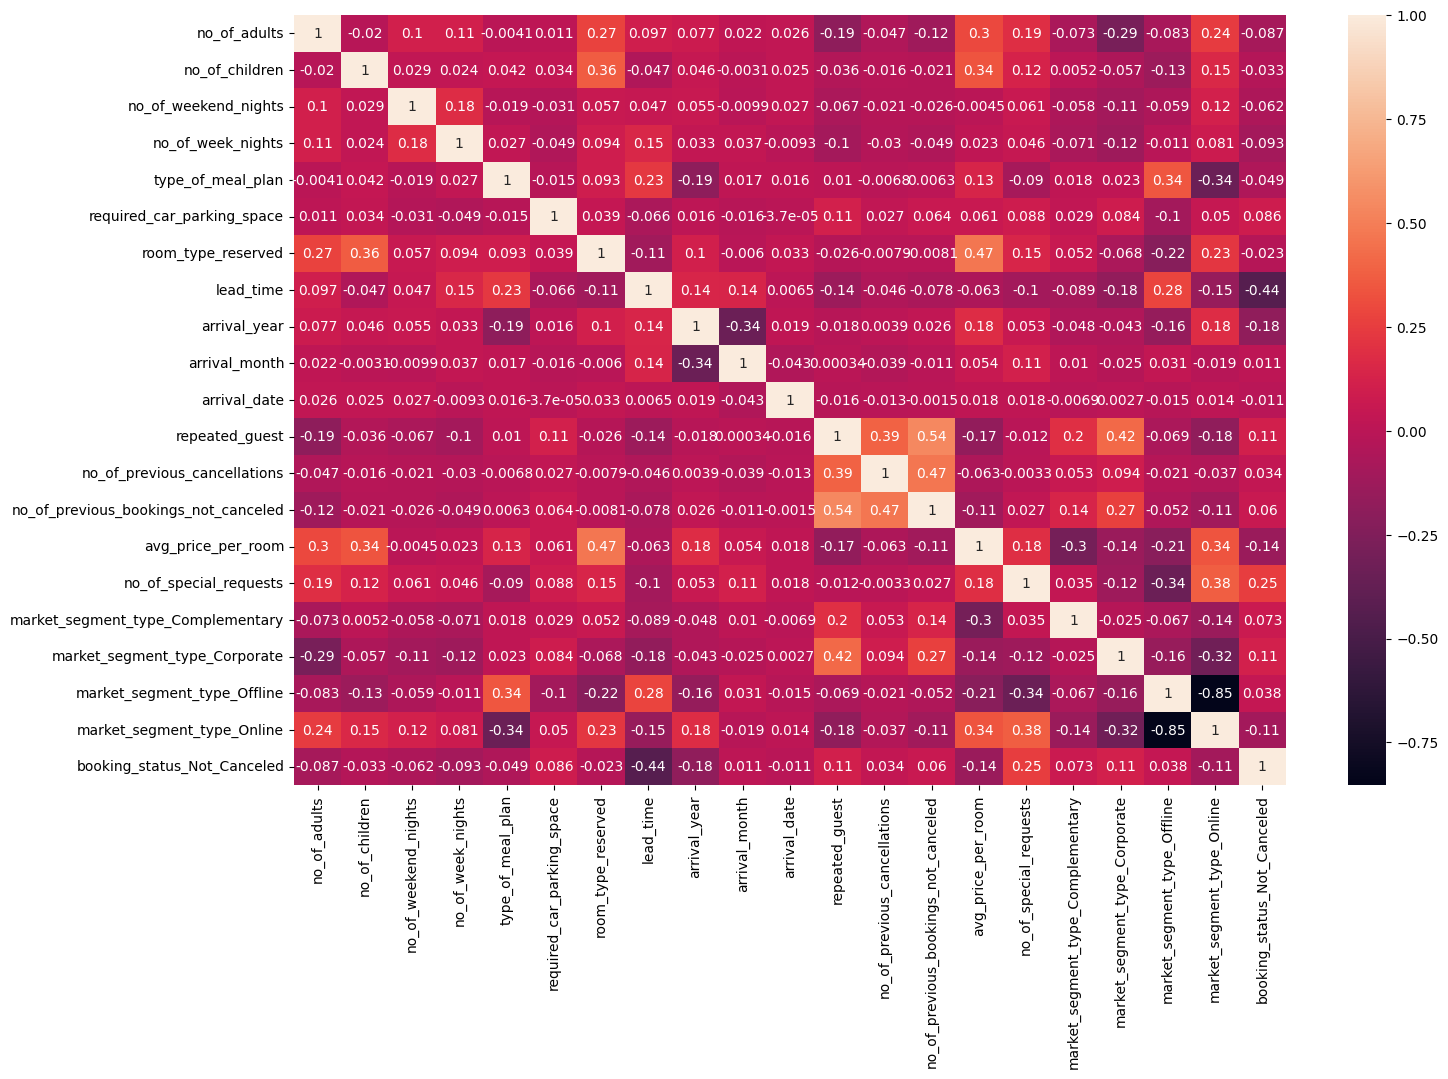

In [ ]:
#Heat map

plt.figure(figsize = (16,10))
sns.heatmap(df2.corr(),annot=True);

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [ ]:
#Split test and Training data

X= df2.drop(['booking_status_Not_Canceled'],axis=1)
Y = df2['booking_status_Not_Canceled']

In [ ]:
# adding a constant to the independent variables
X = sm.add_constant(X)

In [ ]:
# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 21)
Shape of test set :  (10883, 21)
Percentage of classes in training set:
1    0.670644
0    0.329356
Name: booking_status_Not_Canceled, dtype: float64
Percentage of classes in test set:
1    0.676376
0    0.323624
Name: booking_status_Not_Canceled, dtype: float64


In [ ]:
vif_series = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],index=X_train.columns,dtype=float)
print(format(vif_series))

const                                   3.890803e+07
no_of_adults                            1.330714e+00
no_of_children                          1.267522e+00
no_of_weekend_nights                    1.068126e+00
no_of_week_nights                       1.086490e+00
type_of_meal_plan                       1.409505e+00
required_car_parking_space              1.038847e+00
room_type_reserved                      1.556293e+00
lead_time                               1.376522e+00
arrival_year                            1.410202e+00
arrival_month                           1.273765e+00
arrival_date                            1.005885e+00
repeated_guest                          1.781553e+00
no_of_previous_cancellations            1.394915e+00
no_of_previous_bookings_not_canceled    1.651273e+00
avg_price_per_room                      1.956711e+00
no_of_special_requests                  1.242152e+00
market_segment_type_Complementary       4.436203e+00
market_segment_type_Corporate           1.6866

## Building a Logistic Regression model

In [ ]:
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


                                Logit Regression Results                               
Dep. Variable:     booking_status_Not_Canceled   No. Observations:                25392
Model:                                   Logit   Df Residuals:                    25371
Method:                                    MLE   Df Model:                           20
Date:                         Fri, 01 Dec 2023   Pseudo R-squ.:                     inf
Time:                                 21:03:04   Log-Likelihood:                   -inf
converged:                               False   LL-Null:                        0.0000
Covariance Type:                     nonrobust   LLR p-value:                     1.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  892.6316    118.846      7.511      0.000     6

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


## Model performance evaluation

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model

def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

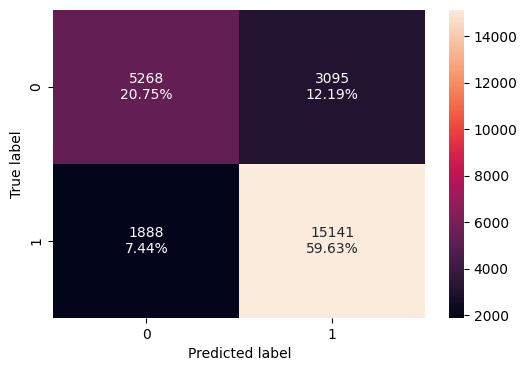

In [ ]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.803757,0.88913,0.830281,0.858698


In [ ]:
#remove high p-value and rebuild the model -arrival_date

X_train= X_train.drop(['arrival_date'],axis=1)

In [ ]:
'''
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())
'''

logit2 = sm.Logit(y_train, X_train.astype(float))
lg2 = logit2.fit(disp=False)

print(lg2.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


                                Logit Regression Results                               
Dep. Variable:     booking_status_Not_Canceled   No. Observations:                25392
Model:                                   Logit   Df Residuals:                    25372
Method:                                    MLE   Df Model:                           19
Date:                         Fri, 01 Dec 2023   Pseudo R-squ.:                     inf
Time:                                 21:03:06   Log-Likelihood:                   -inf
converged:                               False   LL-Null:                        0.0000
Covariance Type:                     nonrobust   LLR p-value:                     1.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  892.5567    118.854      7.510      0.000     6

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [ ]:
# remove next high p-value and rebuild the model -- no_of_children
X_train= X_train.drop(['no_of_children'],axis=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25392 entries, 13662 to 33003
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   const                                 25392 non-null  float64
 1   no_of_adults                          25392 non-null  int64  
 2   no_of_weekend_nights                  25392 non-null  int64  
 3   no_of_week_nights                     25392 non-null  int64  
 4   type_of_meal_plan                     25392 non-null  int64  
 5   required_car_parking_space            25392 non-null  int64  
 6   room_type_reserved                    25392 non-null  int64  
 7   lead_time                             25392 non-null  int64  
 8   arrival_year                          25392 non-null  int64  
 9   arrival_month                         25392 non-null  int64  
 10  repeated_guest                        25392 non-null  int64  
 11  no_of_previ

In [ ]:
logit3 = sm.Logit(y_train, X_train.astype(float))
lg3 = logit3.fit(disp=False)

print(lg3.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                Logit Regression Results                               
Dep. Variable:     booking_status_Not_Canceled   No. Observations:                25392
Model:                                   Logit   Df Residuals:                    25373
Method:                                    MLE   Df Model:                           18
Date:                         Fri, 01 Dec 2023   Pseudo R-squ.:                     inf
Time:                                 21:03:06   Log-Likelihood:                   -inf
converged:                               False   LL-Null:                        0.0000
Covariance Type:                     nonrobust   LLR p-value:                     1.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  888.4300    118.743      7.482      0.000     6

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [ ]:
# remove next high p-value and rebuild the model - no_of_previous_bookings_not_canceled
X_train= X_train.drop(['no_of_previous_bookings_not_canceled'],axis=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25392 entries, 13662 to 33003
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   const                              25392 non-null  float64
 1   no_of_adults                       25392 non-null  int64  
 2   no_of_weekend_nights               25392 non-null  int64  
 3   no_of_week_nights                  25392 non-null  int64  
 4   type_of_meal_plan                  25392 non-null  int64  
 5   required_car_parking_space         25392 non-null  int64  
 6   room_type_reserved                 25392 non-null  int64  
 7   lead_time                          25392 non-null  int64  
 8   arrival_year                       25392 non-null  int64  
 9   arrival_month                      25392 non-null  int64  
 10  repeated_guest                     25392 non-null  int64  
 11  no_of_previous_cancellations       25392 non-null 

In [ ]:
logit4 = sm.Logit(y_train, X_train.astype(float))
lg4 = logit4.fit(disp=False)

print(lg4.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                Logit Regression Results                               
Dep. Variable:     booking_status_Not_Canceled   No. Observations:                25392
Model:                                   Logit   Df Residuals:                    25374
Method:                                    MLE   Df Model:                           17
Date:                         Fri, 01 Dec 2023   Pseudo R-squ.:                     inf
Time:                                 21:03:07   Log-Likelihood:                   -inf
converged:                               False   LL-Null:                        0.0000
Covariance Type:                     nonrobust   LLR p-value:                     1.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               886.8920    118.753      7.468      0.000     654.140   

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [ ]:
# remove next high p-value and rebuild the model - market_segment_type_Complementary
X_train= X_train.drop(['market_segment_type_Complementary'],axis=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25392 entries, 13662 to 33003
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   const                          25392 non-null  float64
 1   no_of_adults                   25392 non-null  int64  
 2   no_of_weekend_nights           25392 non-null  int64  
 3   no_of_week_nights              25392 non-null  int64  
 4   type_of_meal_plan              25392 non-null  int64  
 5   required_car_parking_space     25392 non-null  int64  
 6   room_type_reserved             25392 non-null  int64  
 7   lead_time                      25392 non-null  int64  
 8   arrival_year                   25392 non-null  int64  
 9   arrival_month                  25392 non-null  int64  
 10  repeated_guest                 25392 non-null  int64  
 11  no_of_previous_cancellations   25392 non-null  int64  
 12  avg_price_per_room             25392 non-n

In [ ]:
logit5 = sm.Logit(y_train, X_train.astype(float))
lg5 = logit5.fit(disp=False)

print(lg5.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                                Logit Regression Results                               
Dep. Variable:     booking_status_Not_Canceled   No. Observations:                25392
Model:                                   Logit   Df Residuals:                    25375
Method:                                    MLE   Df Model:                           16
Date:                         Fri, 01 Dec 2023   Pseudo R-squ.:                     inf
Time:                                 21:03:08   Log-Likelihood:                   -inf
converged:                                True   LL-Null:                        0.0000
Covariance Type:                     nonrobust   LLR p-value:                     1.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           891.0855    118.580      7.515      0.000     658.673    1123.498
no

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [ ]:
# remove next high p-value and rebuild the model - market_segment_type_Online
X_train= X_train.drop(['market_segment_type_Online'],axis=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25392 entries, 13662 to 33003
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   const                          25392 non-null  float64
 1   no_of_adults                   25392 non-null  int64  
 2   no_of_weekend_nights           25392 non-null  int64  
 3   no_of_week_nights              25392 non-null  int64  
 4   type_of_meal_plan              25392 non-null  int64  
 5   required_car_parking_space     25392 non-null  int64  
 6   room_type_reserved             25392 non-null  int64  
 7   lead_time                      25392 non-null  int64  
 8   arrival_year                   25392 non-null  int64  
 9   arrival_month                  25392 non-null  int64  
 10  repeated_guest                 25392 non-null  int64  
 11  no_of_previous_cancellations   25392 non-null  int64  
 12  avg_price_per_room             25392 non-n

In [ ]:
logit6 = sm.Logit(y_train, X_train.astype(float))
lg6 = logit6.fit(disp=False)

print(lg6.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                                Logit Regression Results                               
Dep. Variable:     booking_status_Not_Canceled   No. Observations:                25392
Model:                                   Logit   Df Residuals:                    25376
Method:                                    MLE   Df Model:                           15
Date:                         Fri, 01 Dec 2023   Pseudo R-squ.:                     inf
Time:                                 21:03:09   Log-Likelihood:                   -inf
converged:                                True   LL-Null:                        0.0000
Covariance Type:                     nonrobust   LLR p-value:                     1.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           888.4048    118.434      7.501      0.000     656.278    1120.531
no

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [ ]:
#lg6 is the final model

# converting coefficients to odds
odds = np.exp(lg6.params)

# finding the percentage change
perc_change_odds = (np.exp(lg6.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


,const,no_of_adults,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,market_segment_type_Corporate,market_segment_type_Offline
Odds,inf,0.880366,0.899317,0.962795,1.096738,4.989199,1.150739,0.984420,0.644710,1.043386,15.590851,0.797577,0.980801,4.328702,2.373492,6.028374
Change_odd%,inf,-11.963419,-10.068333,-3.720459,9.673800,398.919887,15.073909,-1.558035,-35.528995,4.338641,1459.085143,-20.242344,-1.919864,332.870176,137.349165,502.837374


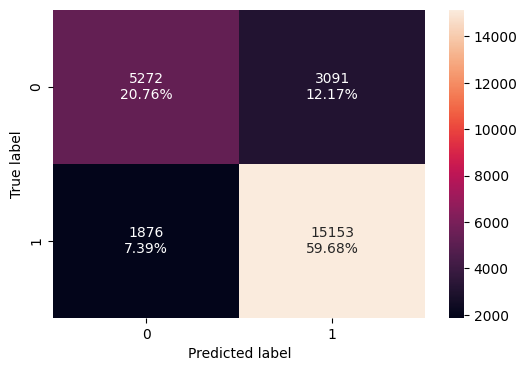

In [ ]:
#Training set performance
# creating confusion matrix
confusion_matrix_statsmodels(lg6, X_train, y_train)

In [ ]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg6, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.804387,0.889835,0.830574,0.859184


In [ ]:
#Test set performance
#Drop the columns from the test set that were dropped from the training set

X_test = X_test[list(X_train.columns)]

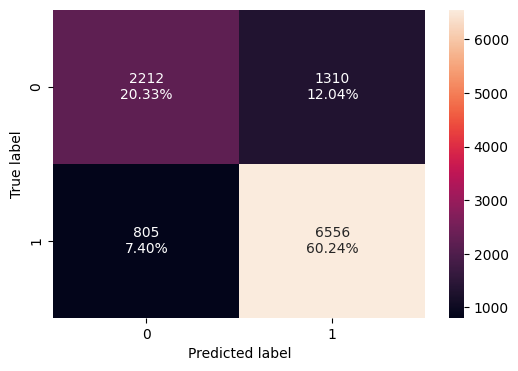

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg6, X_test, y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg6, X_test, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80566,0.89064,0.83346,0.861102


-The model is giving a good f1_score of ~0.86 and ~0.86 on the train and test sets respectively

-As the train and test performances are comparable, the model is not overfitting

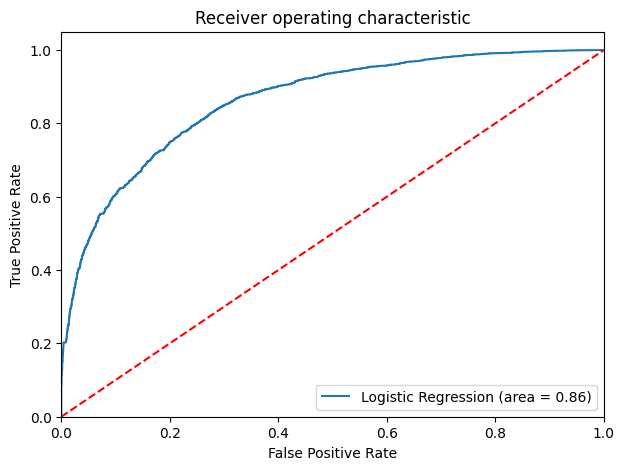

In [ ]:
#Metrics check - Find Threshold by ROC curve
#ROC curve, AUC on training set

logit_roc_auc_train = roc_auc_score(y_train, lg6.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, lg6.predict(X_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg6.predict(X_train))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.6830673376660951


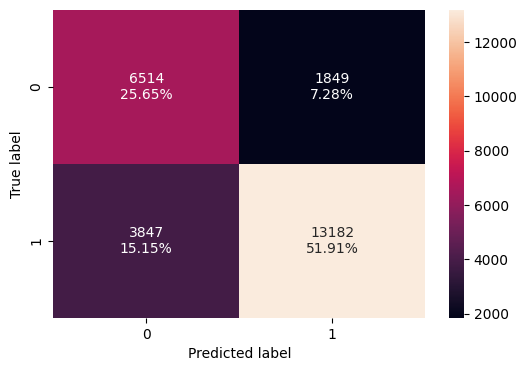

In [ ]:
#Check Model performance based on AUC,ROC - Training set
# creating confusion matrix
confusion_matrix_statsmodels(lg6, X_train, y_train, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(lg6, X_train, y_train, threshold=optimal_threshold_auc_roc)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.775677,0.774091,0.876988,0.822333


- Precision of model has increased but the other metrics have reduced.
- The model is still giving a good performance.

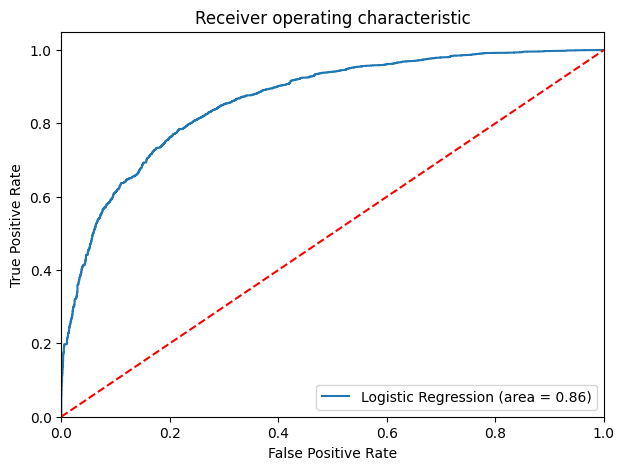

In [ ]:
#Check Model performance based on AUC,ROC - Test set
logit_roc_auc_train = roc_auc_score(y_test, lg6.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lg6.predict(X_test))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()


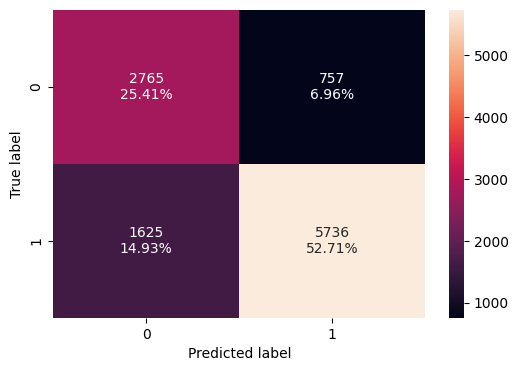

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg6, X_test, y_test, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(lg6, X_test, y_test, threshold=optimal_threshold_auc_roc)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.781127,0.779242,0.883413,0.828064


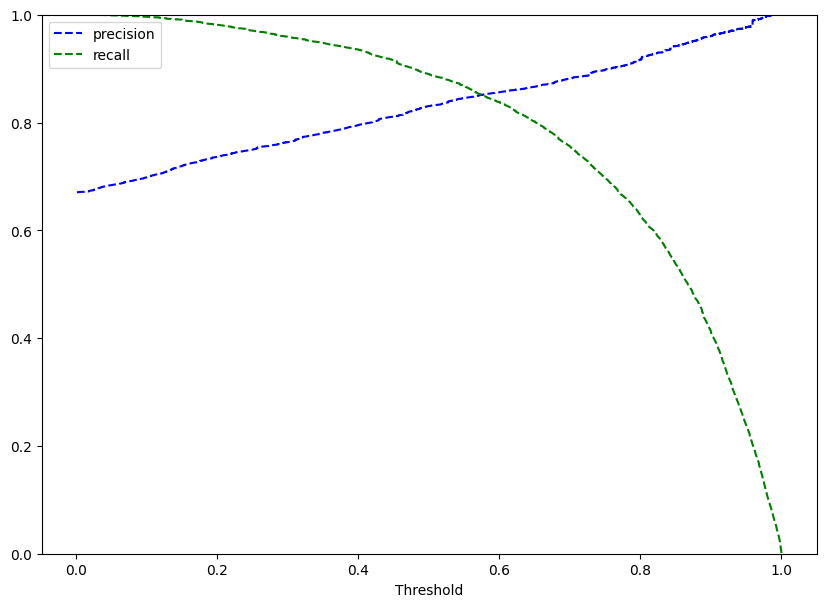

In [ ]:
#Metrics check - Find Threshold by Precision-Recall curve
#Precision-Recall curve on training set

y_scores = lg6.predict(X_train)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [ ]:
# From above curve, at the threshold of 0.58, we get balanced recall and precision
# setting the threshold
optimal_threshold_curve = 0.59

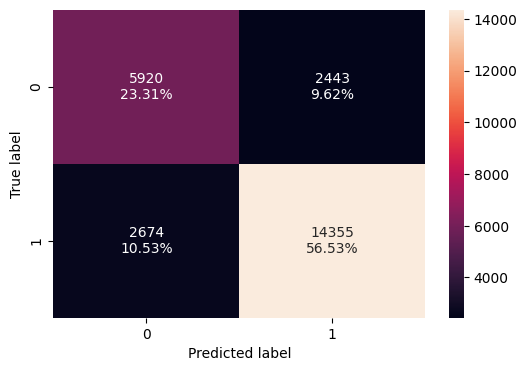

In [ ]:
#Checking model performance on training set
# creating confusion matrix
confusion_matrix_statsmodels(lg6, X_train, y_train, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(lg6, X_train, y_train, threshold=optimal_threshold_curve)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79848,0.842974,0.854566,0.84873


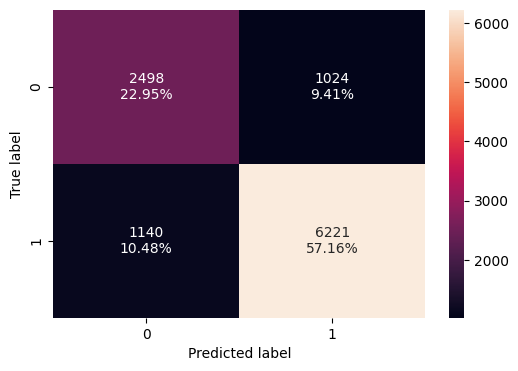

In [ ]:
#Checking model performance on test set
# creating confusion matrix
confusion_matrix_statsmodels(lg6, X_test, y_test, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(lg6, X_test, y_test, threshold=optimal_threshold_curve)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.801158,0.84513,0.858661,0.851842


In [ ]:
######### Model comparision #########
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.76 Threshold",
    "Logistic Regression-0.58 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.76 Threshold,Logistic Regression-0.58 Threshold
Accuracy,0.804387,0.775677,0.798480
Recall,0.889835,0.774091,0.842974
Precision,0.830574,0.876988,0.854566
F1,0.859184,0.822333,0.848730


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.76 Threshold",
    "Logistic Regression-0.58 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.76 Threshold,Logistic Regression-0.58 Threshold
Accuracy,0.805660,0.781127,0.801158
Recall,0.890640,0.779242,0.845130
Precision,0.833460,0.883413,0.858661
F1,0.861102,0.828064,0.851842


**Observations:**
- No overfitting

- Default threshold(0.5) gives best F1 score - So, let's fix this as final model

## Final Model Summary

**Logistic Regression Results:**

- This predictive model to predict if a reservation made will be cancelled or not is built with 86% accuracy
- Market segment, Type of customer - Repeated/New, Special requests, Meal plan, Room type, Parking space are the coefficients that are positively correlated
- Price, Lead time, number of guests, arrival year are negatively correlated to target variable

## Building a Decision Tree model

In [ ]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

**Model evaluation Criteria:**

**Errors:**

- False positive: When we predict a reservation will be cancelled and it is not cancelled
- False negative : When we predict a reservation will NOT be cancelled and it is cancelled

**Priority:**

- False negative
- Reason is when we expect no cancellation and when the reservation gets cancelled results in loss.

**How to avoid:**

- We should focus on Recall

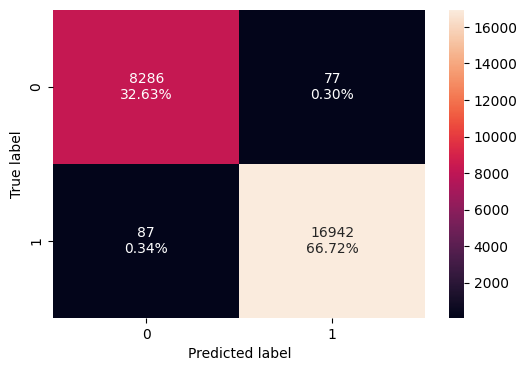

In [ ]:
#Calculate Conf.matrix and metrics for training set
confusion_matrix_statsmodels(model0, X_train, y_train)

In [ ]:
decision_tree_perf_train_NoWeights = model_performance_classification_statsmodels(model0, X_train, y_train)
decision_tree_perf_train_NoWeights

,Accuracy,Recall,Precision,F1
0,0.993541,0.994891,0.995476,0.995183


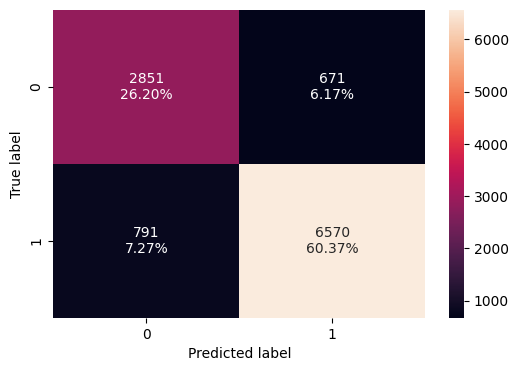

In [ ]:
#Calculate Conf.matrix and metrics for Test set
confusion_matrix_statsmodels(model0, X_test, y_test)

In [ ]:
decision_tree_perf_test_NoWeights = model_performance_classification_statsmodels(model0, X_test, y_test)
decision_tree_perf_test_NoWeights

,Accuracy,Recall,Precision,F1
0,0.865662,0.892542,0.907333,0.899877


In [ ]:
#Decision tree with weights
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

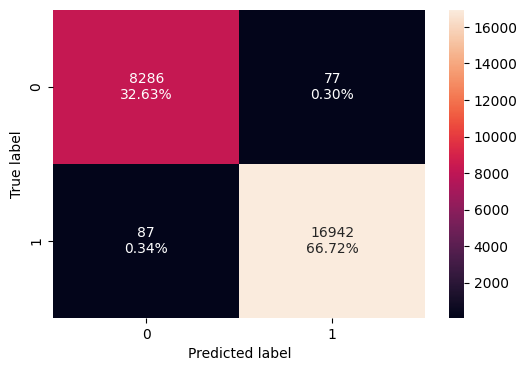

In [ ]:
#Calculate Conf.matrix and metrics for training set
confusion_matrix_statsmodels(model0, X_train, y_train)

In [ ]:
decision_tree_perf_train_withWeights = model_performance_classification_statsmodels(model0, X_train, y_train)
decision_tree_perf_train_withWeights

,Accuracy,Recall,Precision,F1
0,0.993541,0.994891,0.995476,0.995183


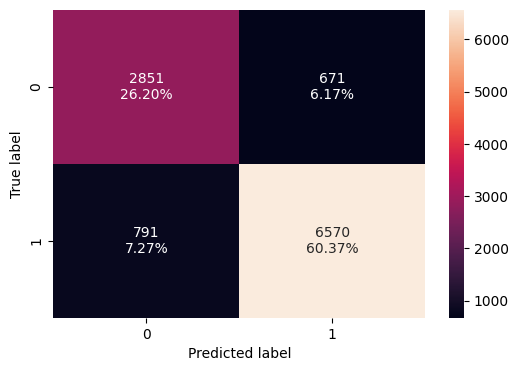

In [ ]:
#Calculate Conf.matrix and metrics for Test set
confusion_matrix_statsmodels(model0, X_test, y_test)

In [ ]:
decision_tree_perf_test_withWeights = model_performance_classification_statsmodels(model0, X_test, y_test)
decision_tree_perf_test_withWeights

,Accuracy,Recall,Precision,F1
0,0.865662,0.892542,0.907333,0.899877


## Do we need to prune the tree?


- Yes. there is a lot of difference in metrics between Training and test set
- Hence the model is overfitting
- Lets try Pre-pruning and post pruning


In [ ]:
#Pre-pruning - Grid Search

# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=50, min_samples_split=10,
                       random_state=1)

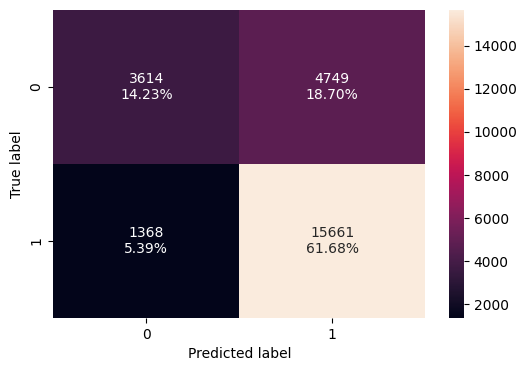

In [ ]:
confusion_matrix_statsmodels(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_statsmodels(estimator, X_train, y_train)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.759097,0.919666,0.76732,0.836614


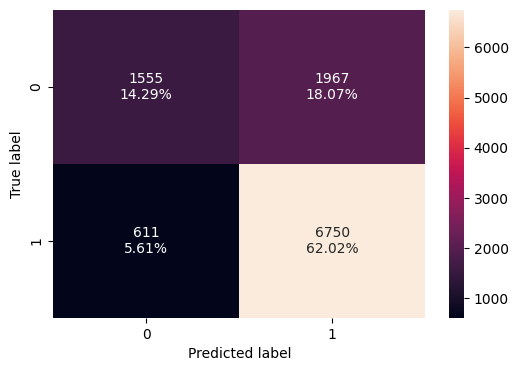

In [ ]:
confusion_matrix_statsmodels(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_statsmodels(estimator, X_test, y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.763117,0.916995,0.774349,0.839657


**Observations - Pre-pruning:**

- Recall value is almost same for Training and Test set(0.92)
- So, we can conclude that there is no overfitting

In [ ]:
#Decision tree - visualization

feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

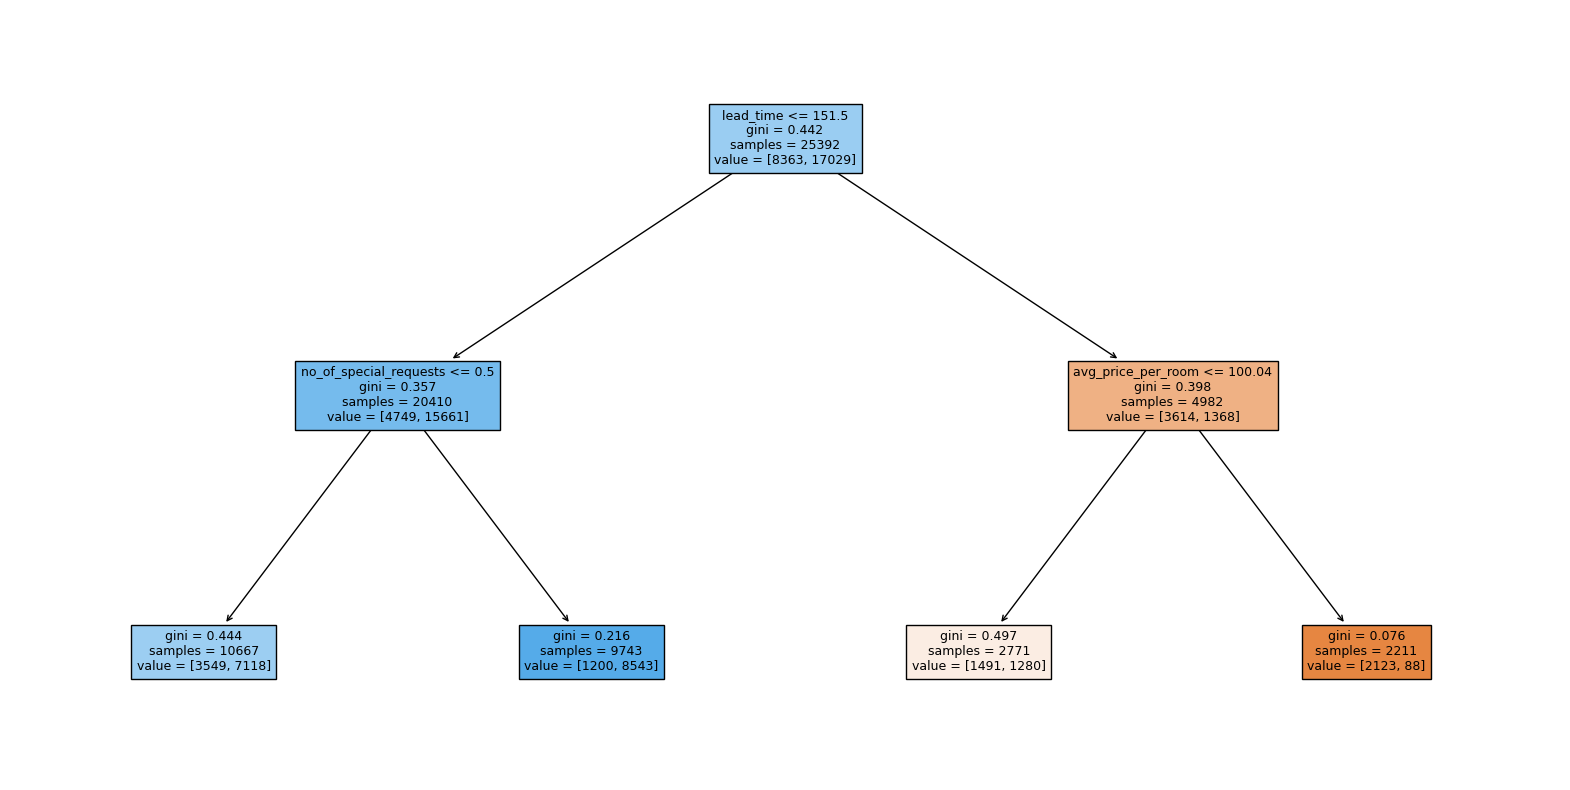

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- weights: [3549.00, 7118.00] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [1200.00, 8543.00] class: 1
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- weights: [1491.00, 1280.00] class: 0
|   |--- avg_price_per_room >  100.04
|   |   |--- weights: [2123.00, 88.00] class: 0



**Interpretation - Pre-pruned decision tree:**

- If the reservation is made with in 151.50 days and number of special requests is equal to 0.50 or greater than 0.50, then the reservation is likely to be ON.
- If the reservation is made before 151.50 days and average room price is equal to or above $100.04, then the reservation is likely to get CANCELLED.

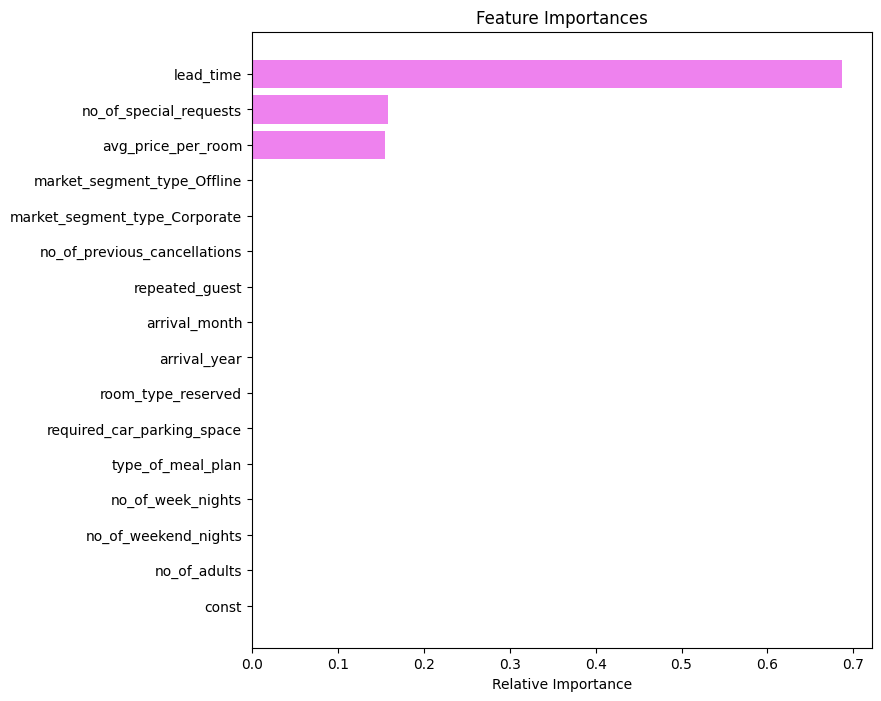

In [ ]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
#Post pruning

clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.009130
1,2.933821e-20,0.009130
2,2.933821e-20,0.009130
3,2.933821e-20,0.009130
4,2.933821e-20,0.009130
...,...,...
1967,9.802243e-03,0.344891
1968,2.153784e-02,0.366429
1969,2.346677e-02,0.389895
1970,2.892554e-02,0.418821


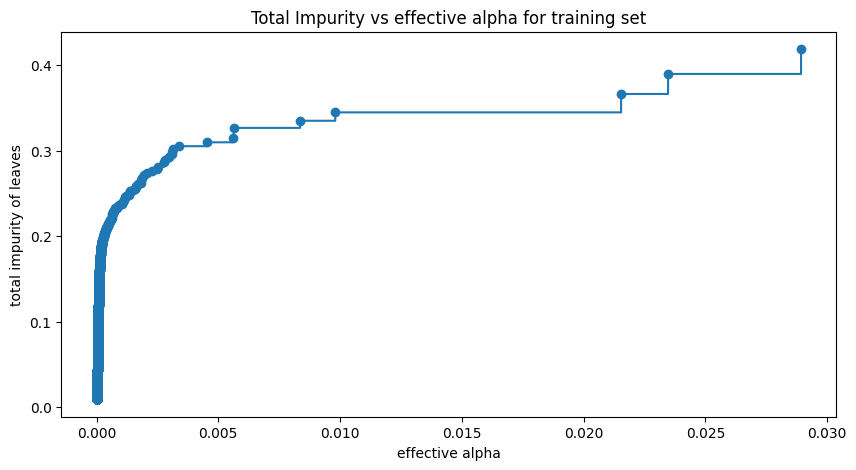

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136888


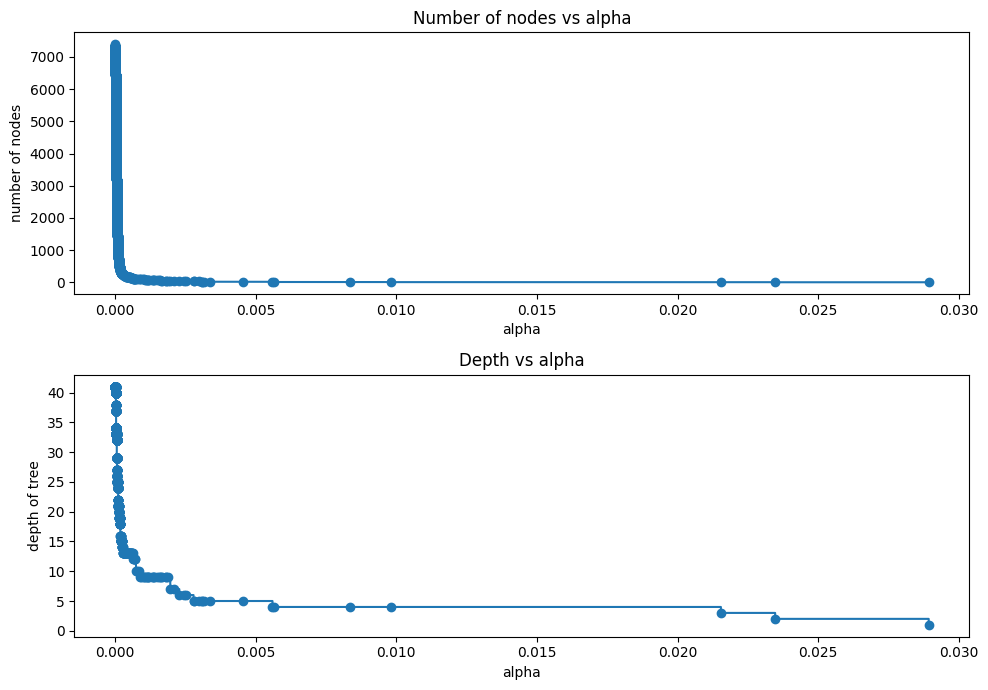

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

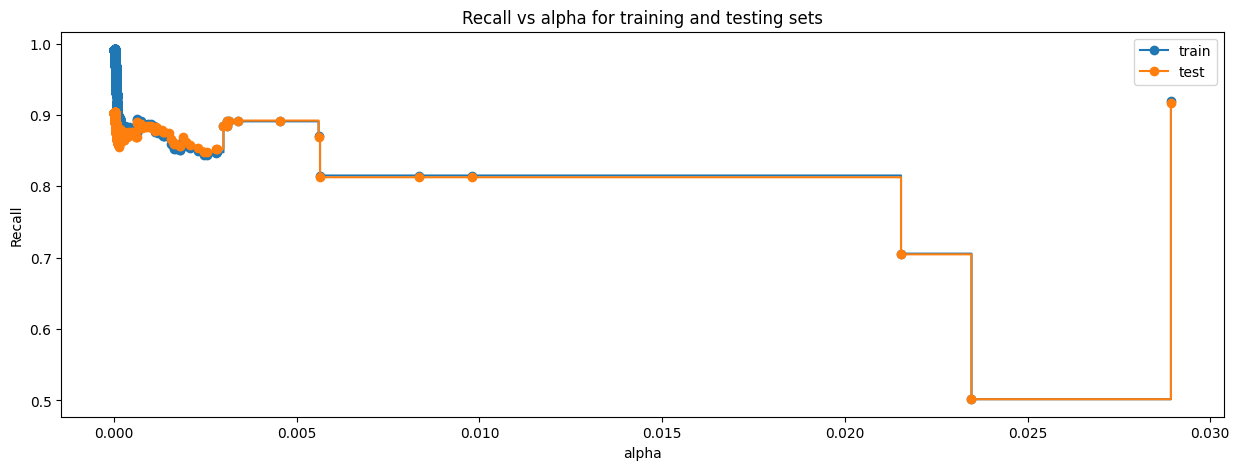

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.02892554026828459, class_weight='balanced',
                       random_state=1)


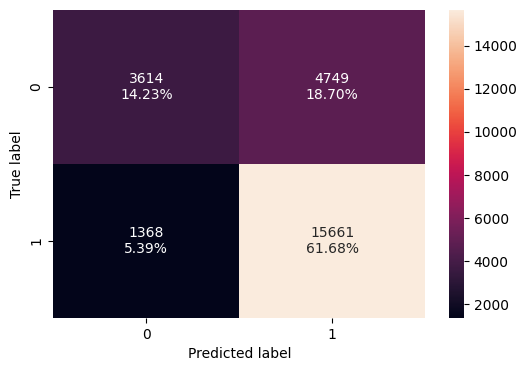

In [ ]:
confusion_matrix_statsmodels(best_model, X_train, y_train)

In [ ]:
decision_tree_post_perf_train = model_performance_classification_statsmodels(best_model, X_train, y_train)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.759097,0.919666,0.76732,0.836614


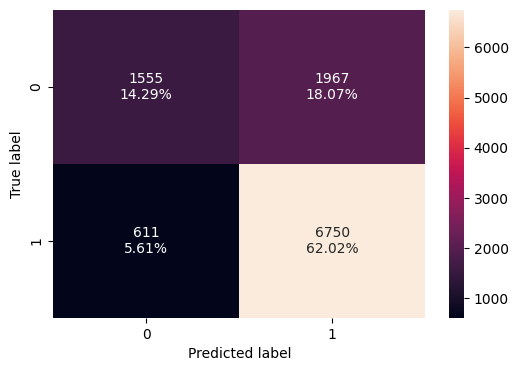

In [ ]:
confusion_matrix_statsmodels(best_model, X_test, y_test)

In [ ]:
decision_tree_post_test = model_performance_classification_statsmodels(best_model, X_test, y_test)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.763117,0.916995,0.774349,0.839657


- Both training and test sets have equal Precision - 0.92
- Model is working fine, no overfitting

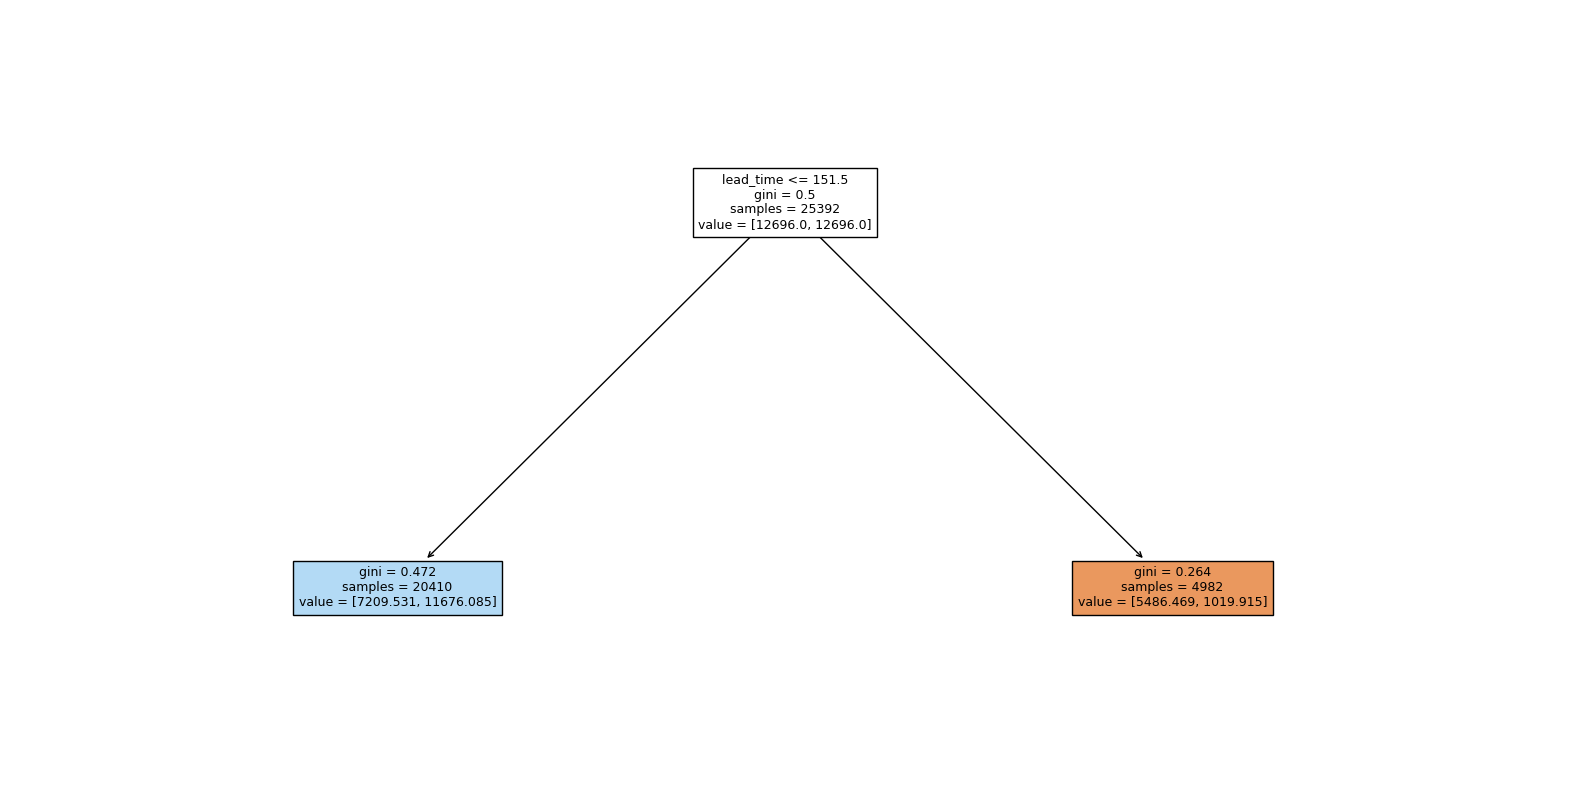

In [ ]:
#Post pruning - Decision tree - visualization

plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- weights: [7209.53, 11676.09] class: 1
|--- lead_time >  151.50
|   |--- weights: [5486.47, 1019.91] class: 0



In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

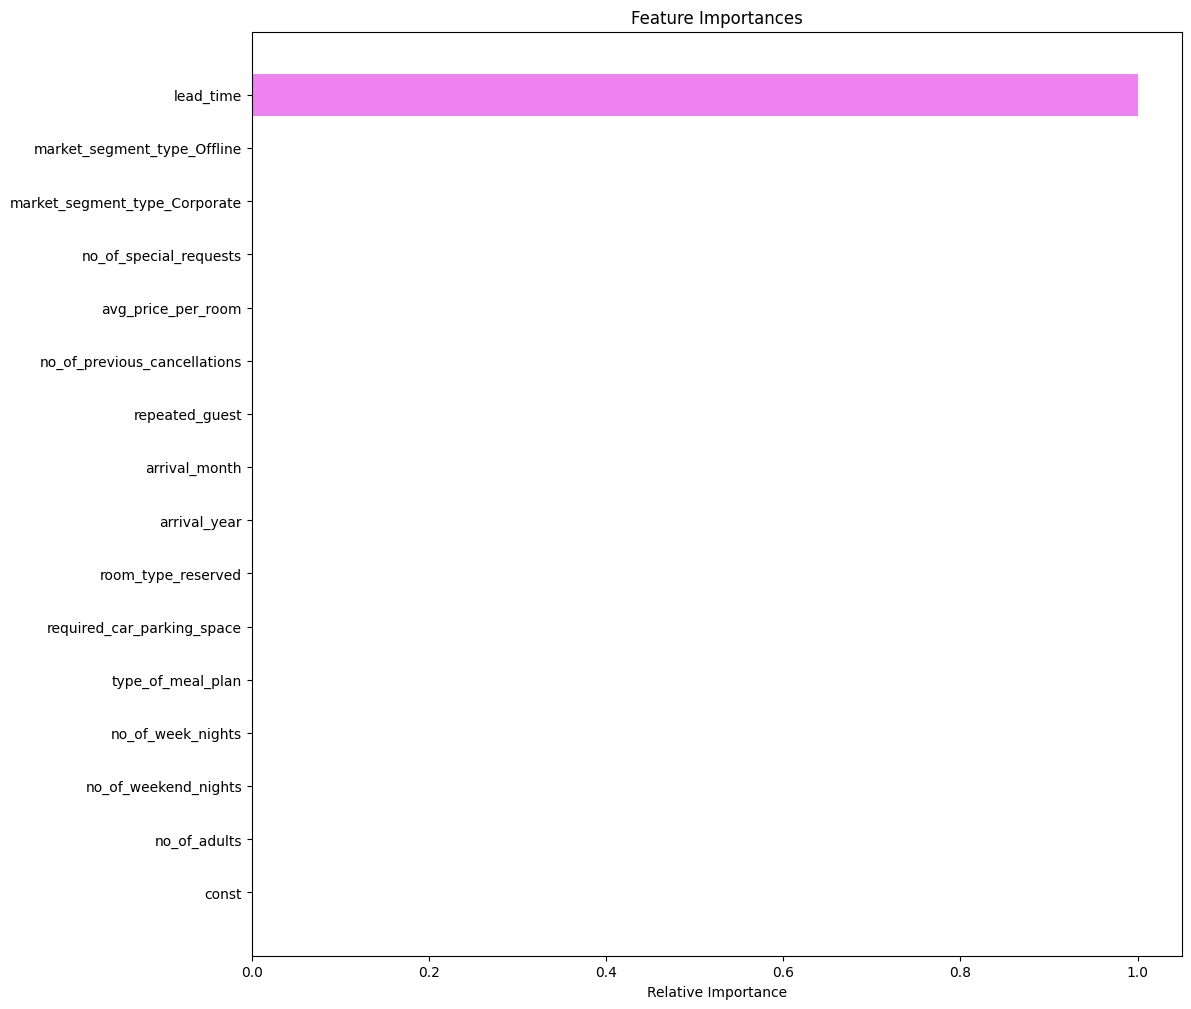

In [ ]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_NoWeights.T,
        decision_tree_perf_train_withWeights.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.993541,0.993541,0.759097,0.759097
Recall,0.994891,0.994891,0.919666,0.919666
Precision,0.995476,0.995476,0.767320,0.767320
F1,0.995183,0.995183,0.836614,0.836614


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_NoWeights.T,
        decision_tree_perf_test_withWeights.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.865662,0.865662,0.763117,0.763117
Recall,0.892542,0.892542,0.916995,0.916995
Precision,0.907333,0.907333,0.774349,0.774349
F1,0.899877,0.899877,0.839657,0.839657


**Observations - Decision tree:**

- Both Pre-pruned and post pruned Decision trees results in same metric values
- Let's choose Pre-pruned Decision tree as the features considered are more than the Post pruned Decision tree

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

- This Model can predict if a reservation will be cancelled or not with 91.70% accuracy
- Lead time, special requests and room price are the important factors that affects cancellation
- If the reservation is made with in 151.50 days and number of special requests is equal to 0.50 or greater than 0.50, then the reservation is likely to be ON
- If the reservation is made before 151.50 days and average room price is equal to or above $100.04, then the reservation is likely to get CANCELLED
- By restricting the lead time to less than 151 days, Hotel can reduce cancellations
- Price plays an important role as well, so Hotel has to be competant with other market players
- Since Special requests has a significant place in retaining the reservation, more personilisations may be added to the customers based on their interests, type of travel etc.,